In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [3]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "../input/leapgestrecog/leapGestRecog"

In [4]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[4, 5, 7, ..., 4, 3, 4],
        [6, 6, 6, ..., 4, 4, 3],
        [5, 6, 6, ..., 5, 4, 4],
        ...,
        [6, 6, 6, ..., 5, 6, 4],
        [6, 5, 5, ..., 5, 6, 4],
        [4, 6, 6, ..., 5, 4, 5]], dtype=uint8),
 0]

In [5]:
# shuffle the input data
import random
random.shuffle(image_data)

In [6]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [7]:
label[:10]

[5, 5, 2, 0, 2, 5, 8, 0, 1, 8]

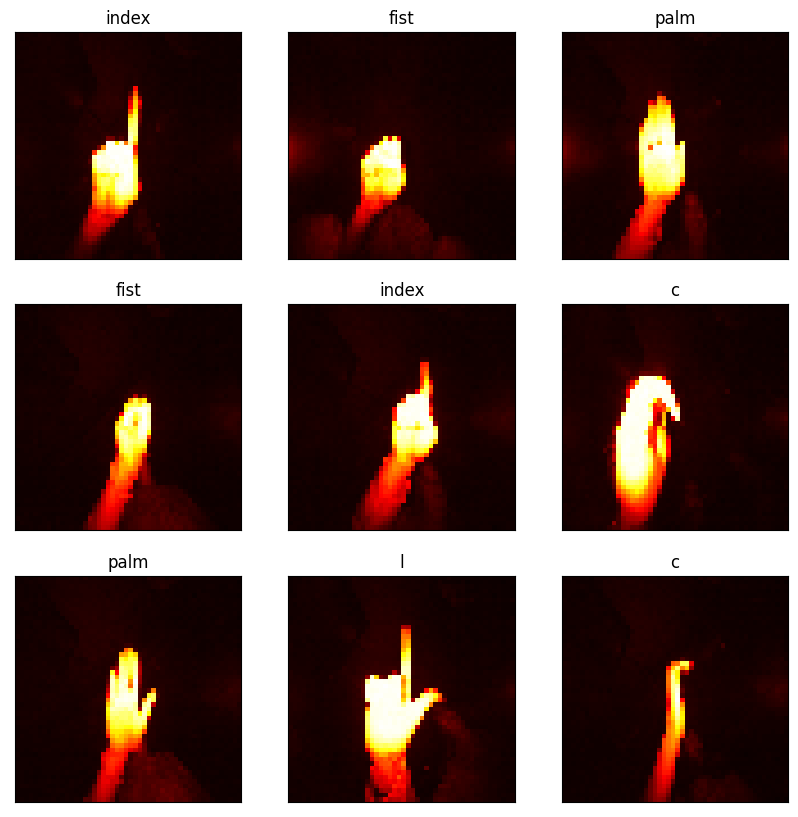

In [8]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [9]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [10]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int8)

In [11]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [12]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [13]:
# original_w = model.get_weights()

In [22]:
import matplotlib.pyplot as plt

dense_layers = [2, 3, 4, 5, 6, 7, 8, 9, 10]
train_accs = []
val_accs = []

for dense_layer in dense_layers:
    model = keras.models.Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(IMG_SIZE, IMG_SIZE, 1)))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=32, kernel_size=(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters=64, kernel_size=(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Flatten())

    for _ in range(dense_layer):
        model.add(Dense(128))
        model.add(Activation('relu'))
        model.add(Dropout(0.3))

    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                 optimizer='rmsprop',
                 metrics=['accuracy'])

    history = model.fit(X_train, y_train, batch_size=32, epochs=2, verbose=0, validation_data=(X_test, y_test))

    train_accs.append(history.history['accuracy'][-1])
    val_accs.append(history.history['val_accuracy'][-1])




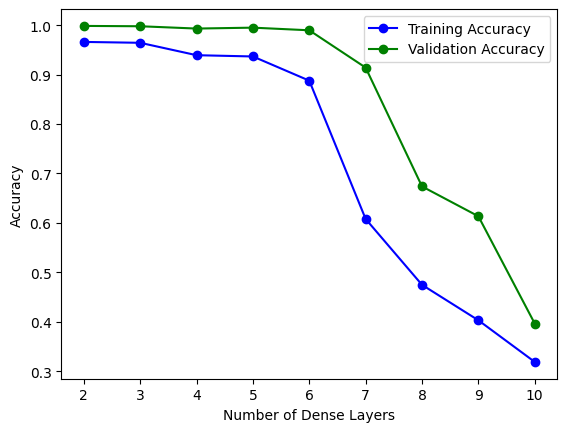

In [23]:
plt.plot(dense_layers, train_accs, 'bo-', label='Training Accuracy')
plt.plot(dense_layers, val_accs, 'go-', label='Validation Accuracy')
plt.xlabel('Number of Dense Layers')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
scalars=[ .25, 0.5, .75, 0.9, 1.1,1.25,1.5,1.75,2.]